In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels)=mnist.load_data()[0]


11490434/11490434 [==============================] - 7s 1us/step


In [3]:
(test_images,test_labels)=mnist.load_data()[1]


In [5]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


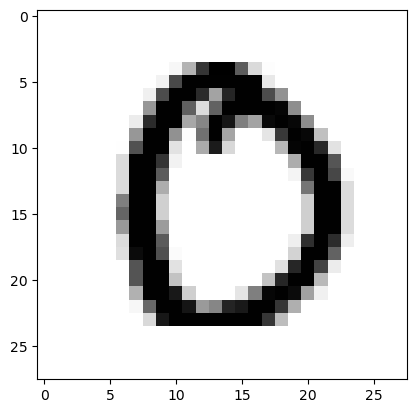

In [11]:
plt.imshow(train_images[88],cmap="gray_r")
plt.show()


In [12]:
train_images=train_images.reshape(train_images.shape[0],28,28,1)
test_images=test_images.reshape(test_images.shape[0],28,28,1)

In [13]:
train_images=train_images.astype("float32")
test_images=test_images.astype("float32")

In [14]:
train_images=train_images/255
test_images=test_images/255

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Flatten

input_shape=(28,28,1)
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))

In [18]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               605824    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [19]:
history=model.fit(x=train_images,y=train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2158 - accuracy: 0.9364
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0833 - accuracy: 0.9738
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0574 - accuracy: 0.9821
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0449 - accuracy: 0.9852
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0339 - accuracy: 0.9889
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0292 - accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0245 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0211 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0216 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 20s 11ms/step -

In [20]:
test_loss,test_accuracy=model.evaluate(test_images,test_labels)
print("test loss: ",test_loss)
print("test accuracy: ",test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0613 - accuracy: 0.9837
test loss:  0.06133566424250603
test accuracy:  0.9836999773979187


In [22]:
hist_dict=history.history
hist_dict.keys()

dict_keys(['loss', 'accuracy'])

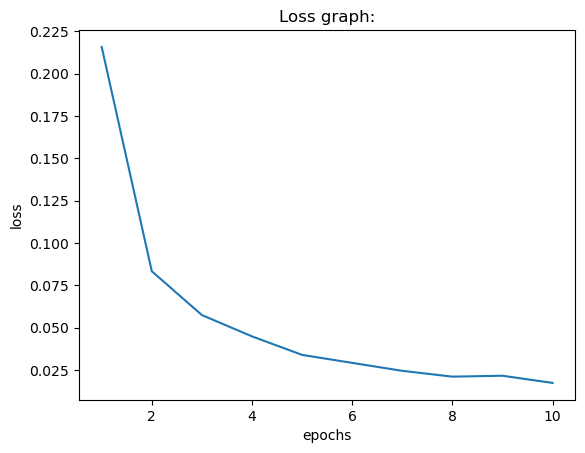

In [25]:
loss=hist_dict["loss"]
accuracy=hist_dict["accuracy"]
epochs=range(1,11)

plt.plot(epochs,loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss graph:")
plt.show()

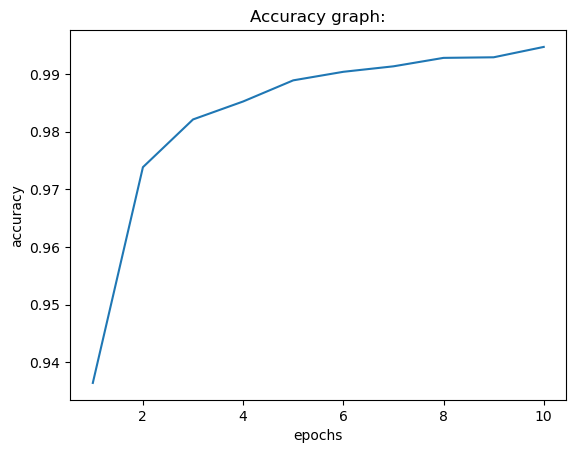

In [26]:

plt.plot(epochs,accuracy)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy graph:")
plt.show()

1/1 [==============================] - 0s 13ms/step
2


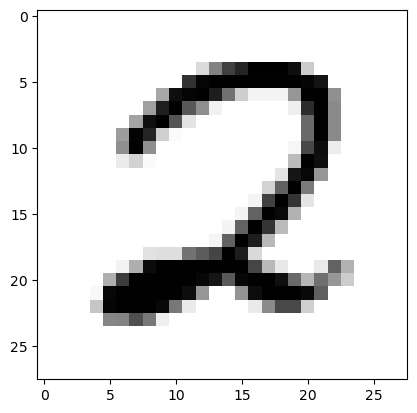

In [46]:
import random

i=random.randint(1,100)
pred=model.predict(test_images[i].reshape(1,28,28,1))
print(pred.argmax())
plt.imshow(test_images[i].reshape(28,28),cmap="gray_r")
plt.show()